In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import scipy as sp


In [87]:
df = pd.read_csv('Advertising.csv')

In [88]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


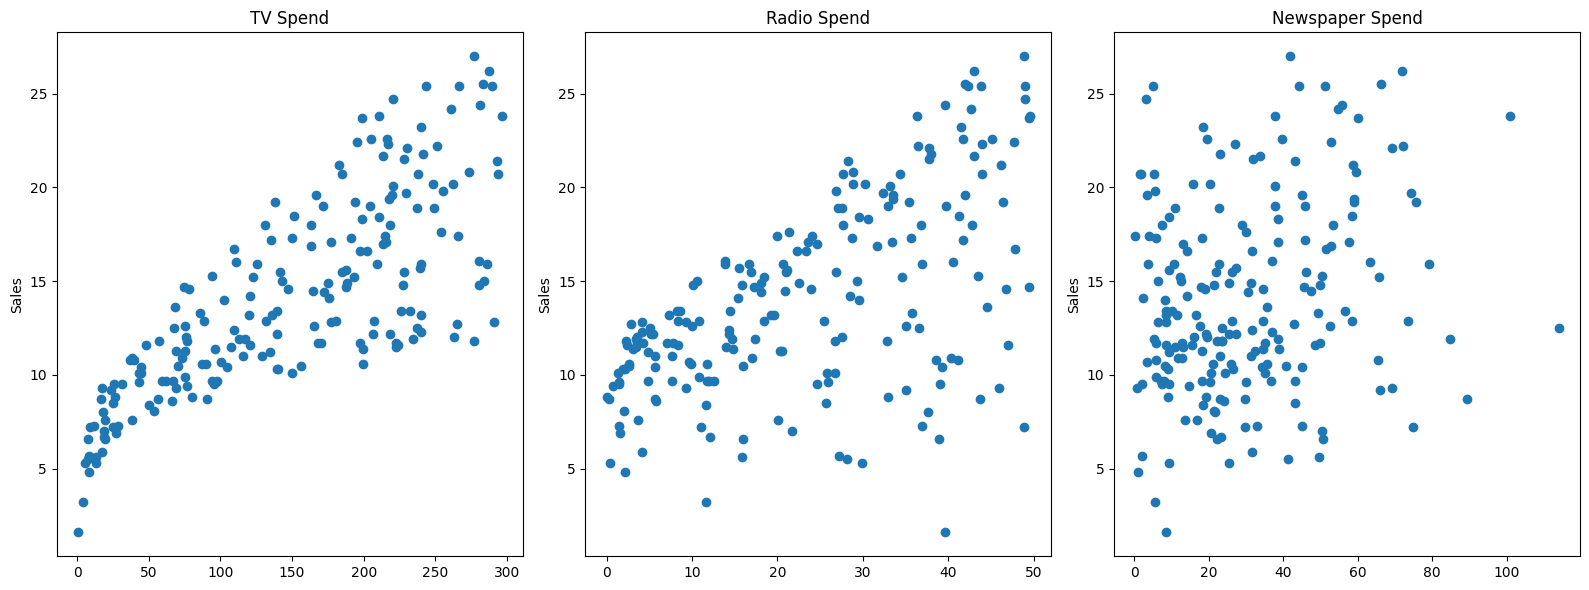

In [89]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')
plt.tight_layout()

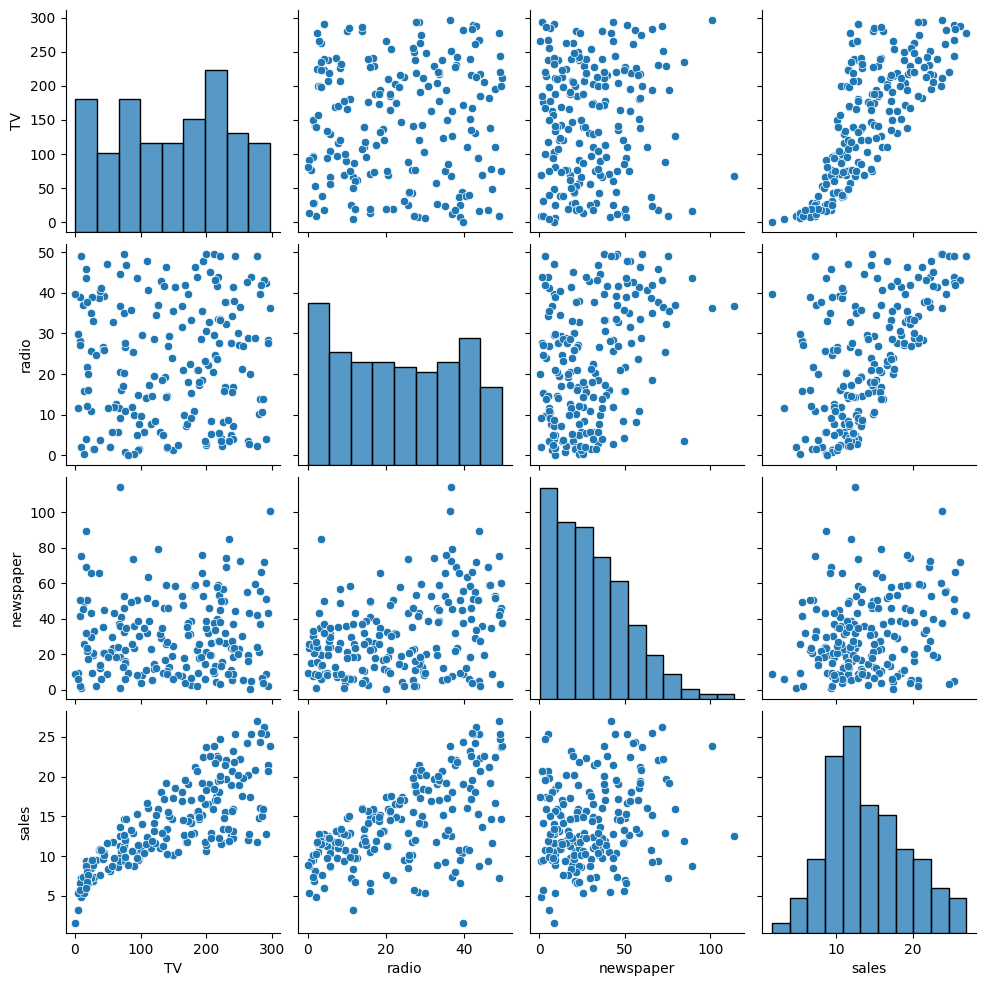

In [90]:
sns.pairplot(df)


In [91]:
X = df.drop('sales',axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [92]:
y = df['sales']
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [94]:
len(df)

200

In [95]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [96]:
model = LinearRegression()

In [97]:
model.fit(X_train,y_train)

LinearRegression()

In [98]:
test_predictions = model.predict(X_test)

In [99]:
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [100]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [101]:
y_test.head()

,sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


In [102]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

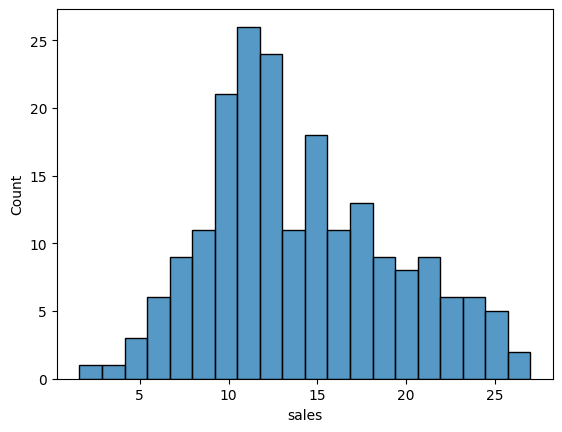

In [103]:
sns.histplot(data=df, x='sales',bins=20)

In [104]:
mean_absolute_error(y_test,test_predictions)

1.5116692224549086

In [105]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.9485372043446387

In [106]:
test_residuals = y_test - test_predictions

In [107]:
#test_residuals

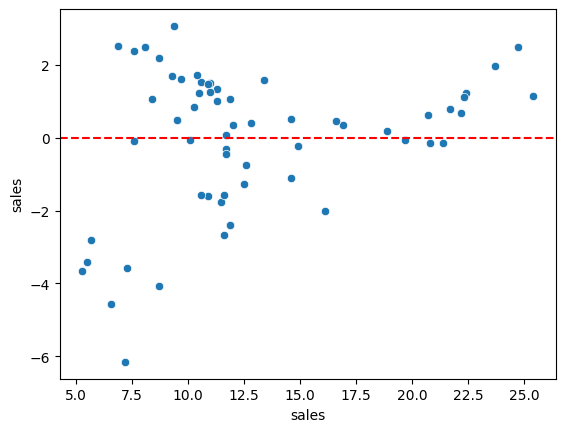

In [108]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls = '--')

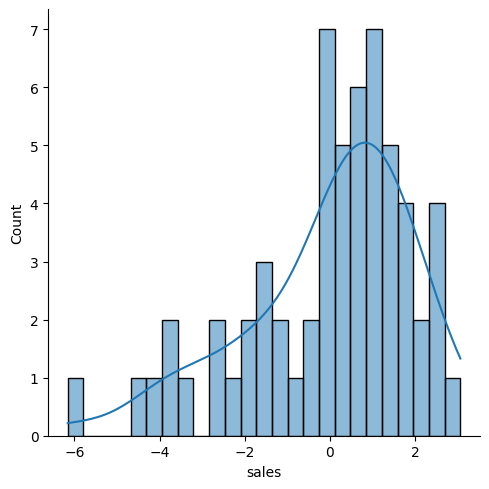

In [109]:
sns.displot(data=test_residuals,bins=25,kde=True)

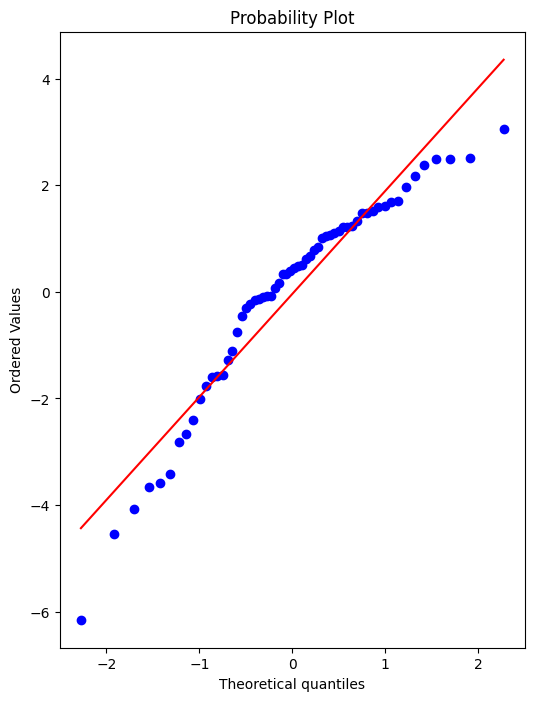

In [110]:
#Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
#probplot returns the raw values if needed
#we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [111]:
final_model = LinearRegression()

In [112]:
final_model.fit(X,y)

LinearRegression()

In [113]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [114]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [117]:
y_hat = final_model.predict(X)

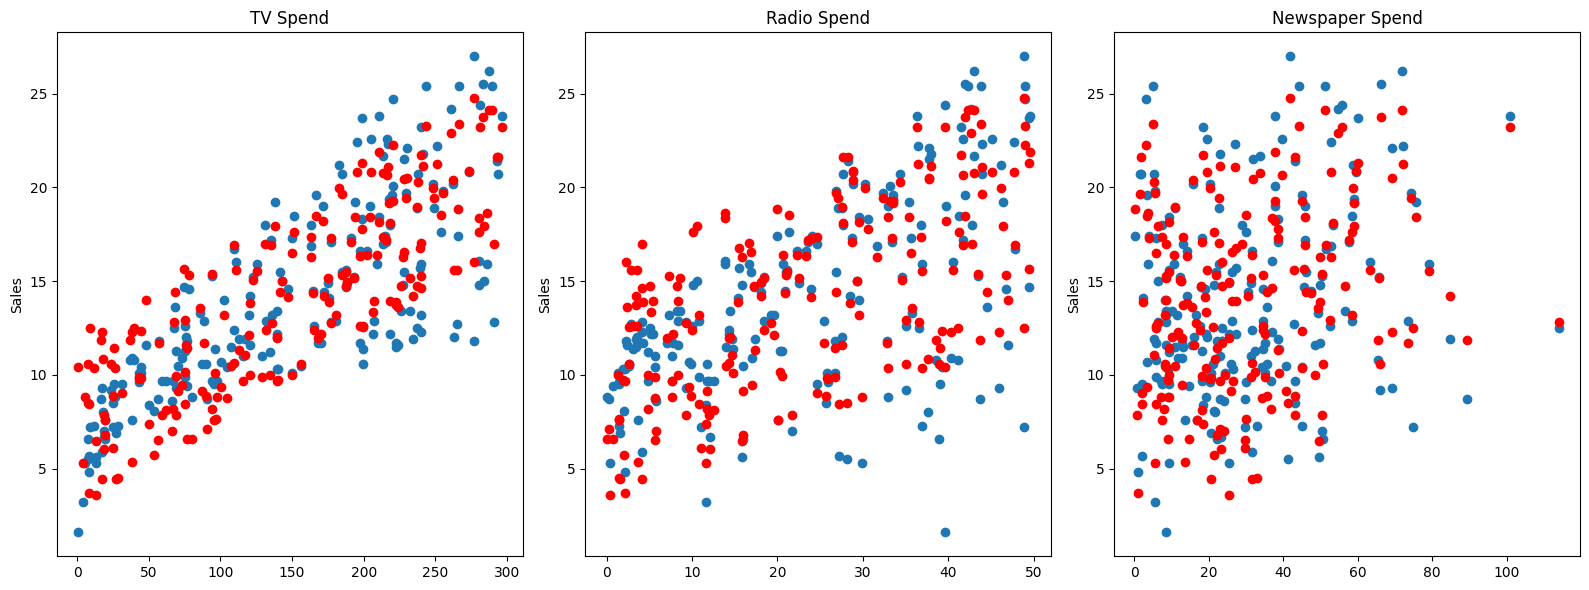

In [120]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')
plt.tight_layout()

In [121]:
from joblib import dump,load

In [126]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [127]:
loaded_model = load('final_sales_model.joblib')

In [128]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [129]:
X.shape

(200, 3)

In [130]:
#149 TV, 22  Radio, 12 Newspaper
#Sales?
campaign = [[149, 22, 12]]

In [131]:
loaded_model.predict(campaign)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])